<a href="https://www.kaggle.com/code/akshatjaggi/eda-regression-on-medical-personal-cost-dataset?scriptVersionId=94971417" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Medical Insurance Cost Prediction
In this Notebook, We are using a dataset called "Medical Personal Cost dataset" from kaggle, in which we have to predict the insurance cost using regression models.
First, We have done Exploratory Data Analysis on the data to know more about the data and can infer some useful insights out of the data. Later, We have also used regression models like Linear Regression, Random Forest, XGBoost Regressor, Gradient Boosting Regressor etc on our data to understand which model work best for predicting the medical insurance cost. 

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance/insurance.csv


In [2]:
df = pd.read_csv("../input/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So as there are no null values in the data, there in no need to worry about any missing values. Now we will use Label Encoder to encode all the categorical features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

So, We have 1338 rows and 7 columns in our dataset.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We observe that the range of values are different and there are categorical variable such as gender, smoker and region present.

In [7]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [8]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Here, we calculated the correlation of all the features with our target feature which is "charges". We can understand it better with help of some kind of visualization. For that we will import matplotlib and seaborn, which are famous libraries used for data visualization.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
print(df.corr()) #We will visualize this data with help of seaborm heatmap.

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


<AxesSubplot:>

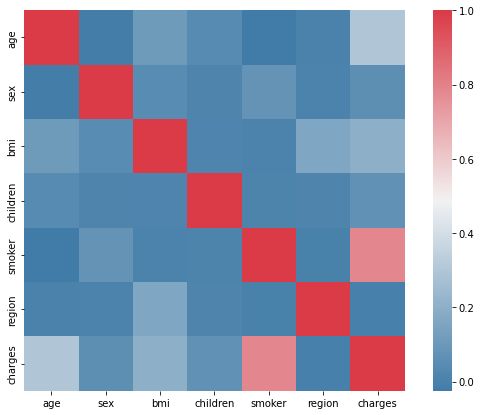

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

A strong correlation is observed only with the fact of smoking the patient. Let's explore more about it.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

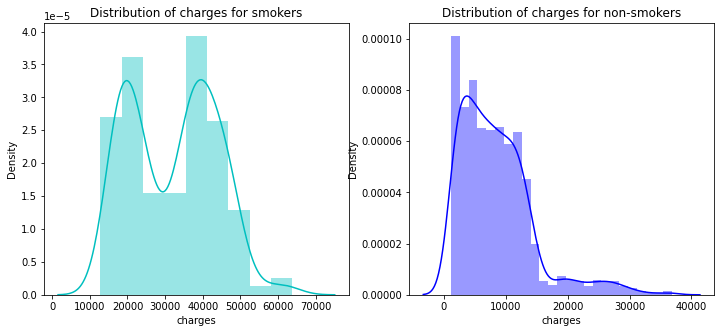

In [12]:
import warnings
warnings.filterwarnings('ignore')
fig= plt.figure(figsize=(12,5))

ax=fig.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=fig.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment. Let's check more on how many smokers and how many non-smokers are there in both genders.

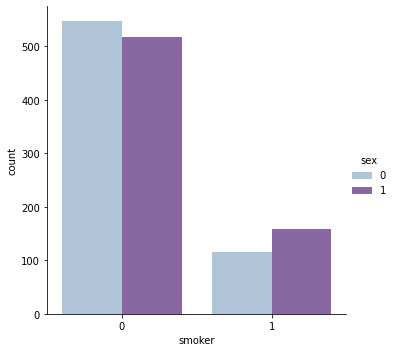

In [13]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="BuPu", data=df);

Here, women are coded with the symbol " 1 "and men "0". Thus non-smoking people are more in number. Also we can notice that there are more male smokers than women smokers. 

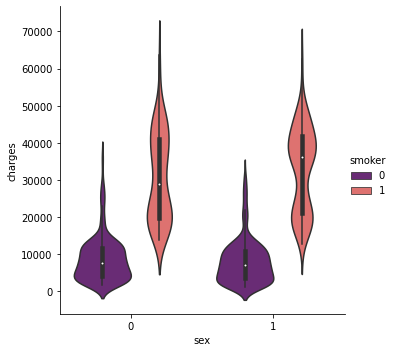

In [14]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma');

Let's make a boxplot between smoker and charges for both the genders to understand the relationship better.

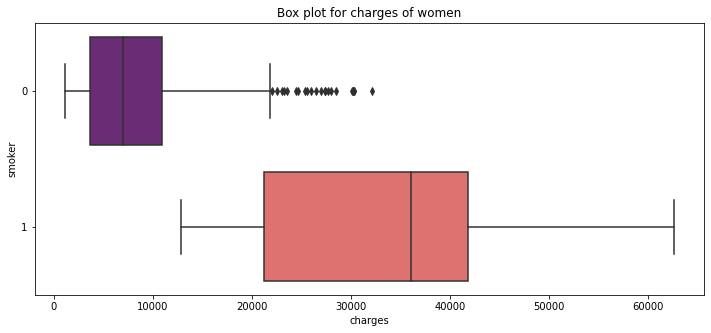

In [15]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'magma');

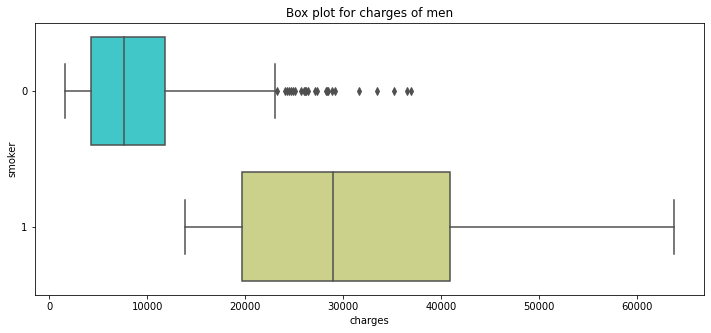

In [16]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'rainbow');

Now let's pay attention to the age of the patients. First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

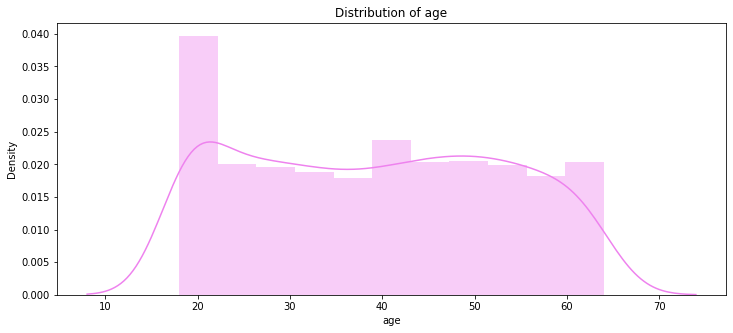

In [17]:
import warnings
warnings.filterwarnings('ignore') 
#To ignore warnings so that our notebook is more presentable

plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'violet')

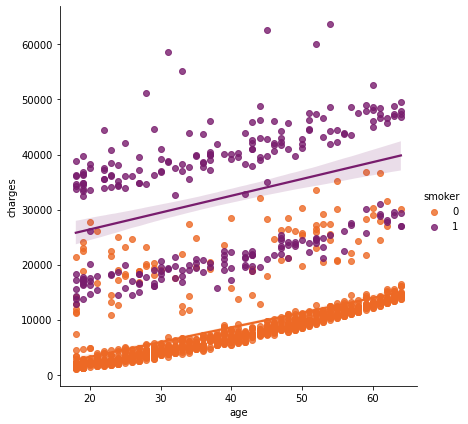

In [18]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r', size = 6)
ax.set_title('Smokers and non-smokers');

In non-smokers as well as smokers, we can see that the cost of treatment increases with age.

### Let's pay attention to BMI and its relationship with medical charges.

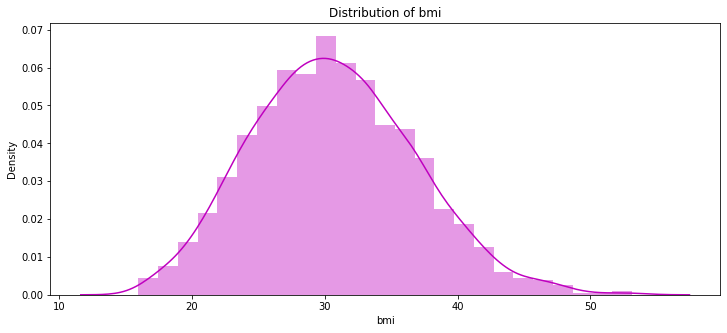

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

So we got a bell curve when we plotted the distribution of BMI in our data. We see that around 30 is our average BMI. Let's see medical charges based on BMI > 30 and BMI < 30.

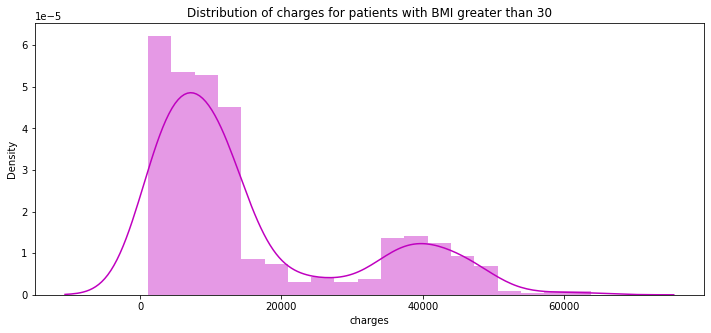

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

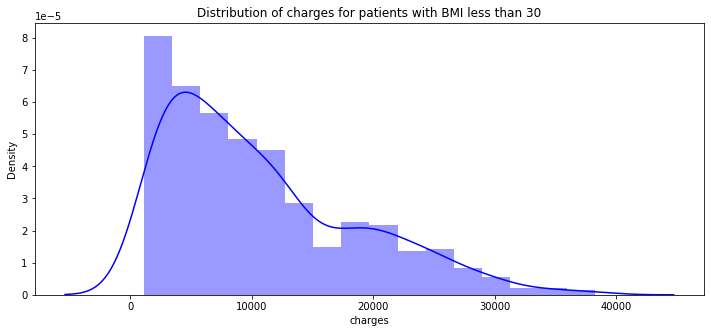

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

It is evident from the two graphs that patients with BMI above 30 spend more on treatment!

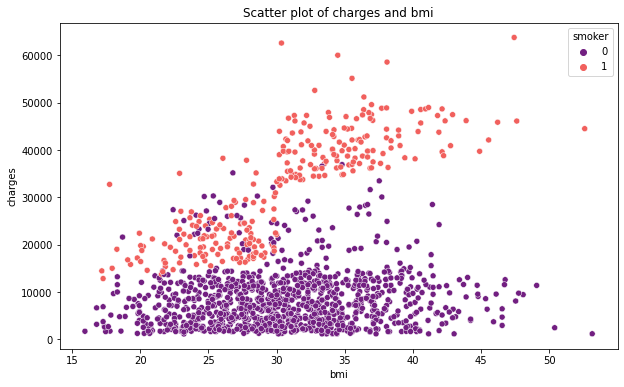

In [22]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi');

As we can see from the scatter plot, With the increase in BMI we see increase in medical charges. We also notice how being a smoker and being a non smoker affects the graph.

Now, let's pay attention to the number of children, patients have, in our data and their relation with our target feature

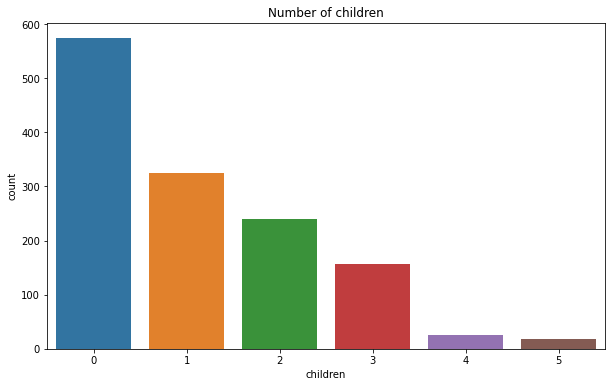

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data = df,x='children')
plt.title('Number of children')
plt.show()

Most patients do not have children while on the other hand some even have 5 children. Let's see if the factor that patients have children affects the smoking.(Do people with 5 children smoke less?) 

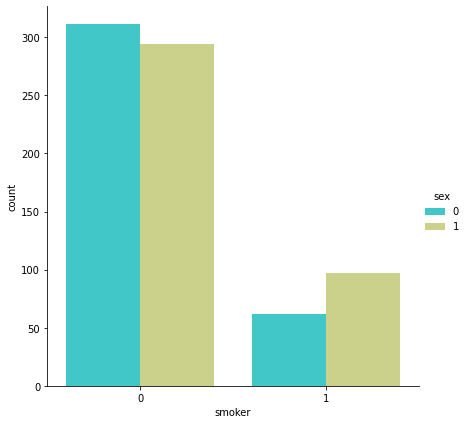

In [24]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=df[(df.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens');

We see that patients who have children mostly don't smoke. This is seen in both of the genders.(This make absolute sense as, in general, people do become health consious if they have children)

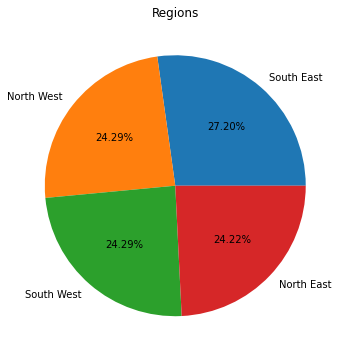

In [25]:
type_value_count = df['region'].value_counts(normalize=True)*100
plt.figure(figsize=(10,6))
plt.pie(type_value_count,labels=['South East','North West','South West','North East'],autopct='%1.2f%%')
plt.title('Regions')
plt.show();

### Now we will predict Insurance with help of different Regression Models

In [26]:
#importing all the necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [27]:
#We will read the dataset again
data1 = pd.read_csv("../input/insurance/insurance.csv")

In [28]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
data1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [30]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
data1['sex'] = pd.factorize(data1['sex'])[0] + 1
data1['region'] = pd.factorize(data1['region'])[0] + 1
data1['smoker'] = pd.factorize(data1['smoker'])[0] + 1

In [32]:
X = data1.drop('charges', axis = 1)
y = data1['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

### Linear Regression

In [34]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], 
             index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], 
             columns=['Metrics'])

,Metrics
MAE_li_reg,3.990250e+03
MSE_li_reg,3.353013e+07
RMSE_li_reg,5.790521e+03


Here, we are comparing the original values of our target variable with the predicted value and then with help of these metrics we see how good or bad our model performed.

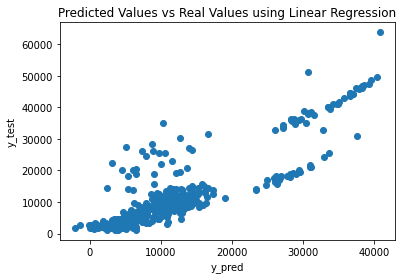

In [36]:
plt.scatter(x=y_pred,y=y_test);
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Predicted Values vs Real Values using Linear Regression");

In [37]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.88791389 0.85653048 0.84404195 0.87198372 0.84417492]


In [38]:
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

0.7613126015198817

In [39]:
linear_reg_model.coef_

array([ 3381.87452209,    32.57376286,  2236.97326776,   594.42725466,
       -9660.36255796,   373.9007914 ])

In [40]:
pd.DataFrame(linear_reg_model.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

# The coefficient for a term represents the change in 
# the mean response associated with a change in that term, 
# while the other terms in the model are held constant. 
# The sign of the coefficient indicates the direction of the 
# relationship between the term and the response.

,coef
age,3381.874522
bmi,2236.973268
children,594.427255
region,373.900791
sex,32.573763
smoker,-9660.362558


### Gradient Boosting Regressor Model

In [41]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [42]:
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], 
             index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], 
             columns=['Metrics'])

,Metrics
MAE_gradient,2.528851e+03
MSE_gradient,2.110725e+07
RMSE_gradient,4.594262e+03


In [43]:
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.94592184 0.91430167 0.91670616 0.92298894 0.91716787]


In [44]:
r2_score(y_test, Gradient_model.predict(X_test_scaled))

0.849746079970233

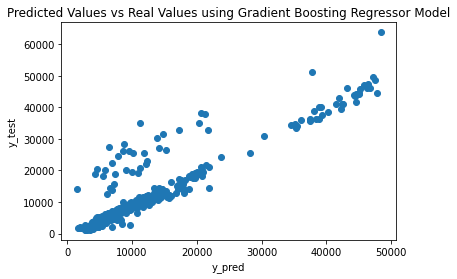

In [45]:
plt.scatter(x=y_pred,y=y_test);
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Predicted Values vs Real Values using Gradient Boosting Regressor Model");

### XGB Regressor Model

In [46]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train_scaled, y_train);

In [47]:
y_pred = XGB_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], 
             columns=['Metrics'])

,Metrics
MAE_XGB,3.103218e+03
MSE_XGB,2.913335e+07
RMSE_XGB,5.397532e+03


In [48]:
scores = cross_val_score(XGB_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.93063684 0.88131858 0.90244945 0.89712902 0.88179435]


In [49]:
r2_score(y_test, XGB_model.predict(X_test_scaled))

0.792611508214176

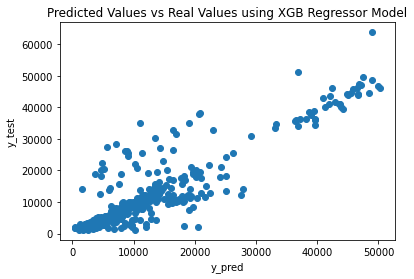

In [50]:
plt.scatter(x=y_pred,y=y_test);
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Predicted Values vs Real Values using XGB Regressor Model");

### Random Forest Regressor Model

In [51]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);

In [52]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], 
             index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], 
             columns=['Metrics'])

,Metrics
MAE_forest_reg,2.871340e+03
MSE_forest_reg,2.495779e+07
RMSE_forest_reg,4.995777e+03


In [53]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.93853184 0.90506367 0.92248559 0.91179603 0.90162884]


In [54]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

0.8223356321895673

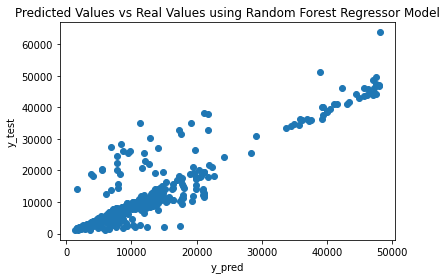

In [55]:
plt.scatter(x=y_pred,y=y_test);
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Predicted Values vs Real Values using Random Forest Regressor Model");

#### Gradient boosting model worked the best for our dataset.